<a href="https://colab.research.google.com/github/danielaz1/python/blob/master/genetic_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Laboratorium 1: NAI
Wprowadzenie do algorytmów genetycznych na przykładzie problemu komiwojażera.

In [0]:
import numpy as np, random, operator
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

## Stworzenie klas i wymaganych funkcji

In [0]:
# Klasa reprezentująca pojedyncze miasto, miasto reprezentowane jest przez 
# współrzędne x, y.
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distance(self, city):
        # Zad 1: Oblicz odległość euklidesową pomiędzy miastami - 1 ptk
        
        distance = math.sqrt( ((self.x-city.x)**2)+((self.y-city.y)**2) )
        
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

In [0]:
city1 = City(4,0)
city2 = City(6,6)
city1.distance(city2)

6.324555320336759

In [0]:
# Klasa obliczająca dopasowanie wykorzystując miarę odległości.
class Fitness:
    def __init__(self, route):
        # Route jest to lista obiektow City, o wspolrzednych x i y
        self.route = route
        self.distance = 0
        self.fitness= 0.0
   
    def routeDistance(self):
        if self.distance ==0:
            pathDistance = 0
            # Zad 2. Oblicz całkowitą trasę (route) - 1 ptk
            self.distance = pathDistance
        for i in range(0,len(self.route)):
          if (i == len(self.route) -1):
              pathDistance += self.route[i].distance(self.route[0])
          else:
              pathDistance += self.route[i].distance(self.route[i + 1])
        return pathDistance
   
    def routeFitness(self):
        if self.fitness == 0:
            # Funkcja dopasowania jest odwrotnością długości trasy.
            # W problemie komiwojażera minimalizujemy odlegość między miastami,
            # stąd im większa jest wartość funkcji dopasowania tym lepiej.
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness  

In [0]:
# Zad 2. Przykladowa lista miast - sprawdzenie czy funkcja Fitness poprawnie oblicza odleglosc
assert(City(1,2).distance(City(5, 5)) == City(5,5).distance(City(1,2)) == 5)
print(Fitness([City(0,0), City(1, 0), City(1, 1), City(0, 1)]).routeDistance())
assert(Fitness([City(0,0), City(1, 0), City(1, 1), City(0, 1)]).routeDistance() == 4)


4.0


## Stwórz populację początkową

In [0]:

def initialPopulation(popSize, cityList):
  

    # popSize - rozmiar populacji początkowej
    # cityList - lista miast
    population = []
        
    # Zadanie 3: Stwórz populację początkową, zwróć listę list populacji.
    # Wskazowka: Wykorzystaj funkcję `random.sample` - 1 ptk
    
    for n in range(0, popSize):
      population.append(random.sample(cityList, len(cityList)))
    
    return population

## Implementacja algorytmu genetycznego

In [0]:
# Obliczanie funkcji dopasowania dla populacji. Zwracany jest posortowany słownik,
# względem malejącej funkcji dopasowania.
def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

In [0]:
def rouletteWheelSelection(popRanked, eliteSize):
    popRankedDict = dict(popRanked)
    fitnessSum = sum(popRankedDict.values())
    selectionResults = []
        
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range (0, len(popRanked) - eliteSize):
      size = len(popRankedDict)
      index = 0
      pick = random.uniform(0, fitnessSum)
      while pick < fitnessSum:
        pick += list(popRankedDict.values())[index]
        index+=1
        if (index > size -1):
          index = 0
      chosen = list(popRankedDict.keys())[index]
      selectionResults.append(chosen)
    return selectionResults

In [0]:
def rankSelection(popRanked, eliteSize):
    popRankedDict = dict(popRanked)
    rankSum = 0
    selectionResults = []
    
    #add ranks
    idx=0
    for i in range(len(popRanked), 0):
      popRankedDict[idx]=i
      idx+=1
        
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range (0, len(popRanked) - eliteSize):
      size = len(popRankedDict)
      index = 0
      pick = random.uniform(0, len(popRanked))
      while pick < rankSum:
        pick += list(popRankedDict.values())[index]
        index+=1
        if (index > size -1):
          index = 0
      chosen = list(popRankedDict.keys())[index]
      selectionResults.append(chosen)
    return selectionResults

In [0]:
def rouletteWheelSelectionRandom(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

In [0]:
def tournamentSelection(popRanked, eliteSize):
    popRankedDict = dict(popRanked)
    selectionResults = []
    
    k = 3
    
    for i in range (0, eliteSize):
      selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):  
      selected = dict(random.sample(popRankedDict.items(), k))
      chosen = max(selected, key=selected.get)
      selectionResults.append(chosen)
      #del popRankedDict[chosen]

    return selectionResults

In [0]:
def selection(popRanked, eliteSize):
    # Zadanie 4: Zaimplementuj wybrany algorytm selekcji, ktory zwroci liste 
    # indeksow z populacji, ktore beda pelnily funkcje rodzica dla nastepnego pokolenia.
    # Opcje: 1) selekcja ruletkowa: proporcjonalna wartosc do wartosci funkcji
    # przystosowania, koniecznosc skalowania 2) Rangowa - zalezna od rangi - 
    # numeru na liscie posortowanej wzgledem przystosowania
    # 3) Turniejowa - wielokrotny wybor najlepszego osobnika z losowo wybieranej 
    # podpoulacji az do skompletowania populacji potomej
    # - 2 ptk
    return tournamentSelection(popRanked, eliteSize)

In [0]:
# Stworzenie zbioru rodzicow, ktory bedzie wykorzystany w reprodukcji.
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

In [0]:
def breed(parent1, parent2):
    # Zdanie 5: Zaimplementuj operacje krzyzowania - 2 ptk
    # Przyklad:
    # parent1 = [1, 2, 3, 4, 5, *6*, *7*, *8*, 9]
    # parent2 = [9, 8, 7, 6, 5, 4, 3, 2, 1]
    # child = [9, 5, 4, 3, 2, *6*, *7*, *8*, 1]
    
    child = []
    
    p1 = random.randint(0, len(parent1))
    p2 = random.randint(0, len(parent1))
    
    start = min(p1, p2)
    end = max(p1, p2)

    toInsert = []
    
    for i in range(0, end-start):
      toInsert.append(parent1[start+i])
    
    parent2Copy = [x for x in parent2 if x not in toInsert]
    index = 0;
    
    for i in range(0, start):
      child.append(parent2Copy[index])
      index+=1
    
    child.extend(toInsert)
    
    for i in range(end, len(parent1)):
      child.append(parent2Copy[index])
      index+=1
    
    return child

In [6]:
parent1 = [1, 2, 3, 4, 5, 6, 7, 8, 9]
parent2 = [9, 8, 7, 6, 5, 4, 3, 2, 1]
breed(parent1, parent2)

[3, 2, 1, 4, 5, 6, 7, 8, 9]

In [0]:
# Funkcja obliczająca krzyżowanie dla całej populacji.
def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

In [0]:
def mutate(individual, mutationRate):
    # Zadanie 6: Zaimplementuj operacje mutacji. Mutacja umozliwia przeszukanie
    # nowej przestrzeni drog. W pojedynczej operacji mutacji zamieniamy dwa miasta
    # losowo wybrane. Miasta sa zamieniane wtedy, kiedy zmienna losowa jest mniejsza
    # od mutationRate. - 2 ptk
    
    rand = random.random()
    if (rand < mutationRate):
      index1 = random.randint(0, len(individual)-1)
      index2 = random.randint(0, len(individual)-1)
      individual[index1], individual[index2] = individual[index2], individual[index1]
    return individual

In [0]:
# Funkcja, ktora uruchamia operacje mutacji dla calej populacji.
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

In [0]:
# Funkcja zbierajaca wszystkie kroki: ocena przystosowania populacji,
# algorytm selekcji, reprodukca i mutacja. Tworzy nowa generacje.
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

In [0]:
# Glowna funkcja implementujaca algorytm genetyczny.
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
    
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

In [0]:
def geneticAlgorithmDistanceList(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
 
    allDistances = []
    
    for i in range(0, generations + 1):
        allDistances.append(1 / rankRoutes(pop)[0][1])
        pop = nextGeneration(pop, eliteSize, mutationRate)
    
    return allDistances

## Uruchamianie algorytmu genetycznego

In [0]:
def drawSingleRoute(route):
  # Zadanie 7: Zaimplementuj funkcję rysującą trasę komiwojażera.
  # Hint: możesz wykorzystać biblioteke matplotlib.pyplot - 1 ptk
  
  routeList = []                                                          
  for i in range(0, len(route)):
    routeList.append([route[i].x, route[i].y])

  data = np.array(routeList)
  plt.plot(data[:, 0], data[:, 1], 'k-o')
  plt.show()
  pass

In [0]:
# Stworzenie listy miast, na poczatek 25 miast

cityList = []

for i in range(0,25):
    cityList.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))

Initial distance: 1850.9965358686532
Final distance: 726.2691078062892
[(107,87), (99,71), (12,161), (136,169), (69,50), (18,147), (128,70), (31,85), (48,133), (170,106), (69,68), (119,14), (46,7), (138,93), (41,134), (65,108), (44,30), (96,169), (38,145), (156,142), (11,111), (71,89), (160,175), (134,74), (106,35)]


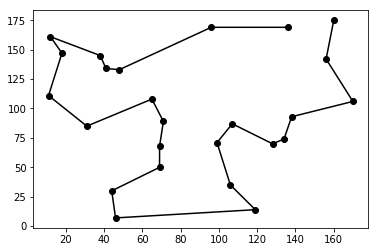

In [0]:
# Uruchomienie algorytmu genetycznego
bestRoute = geneticAlgorithm(population=cityList, popSize=100, eliteSize=20, mutationRate=0.02, generations=1000)
print(cityList)
drawSingleRoute(bestRoute)

## Rysowanie postępu algorytmu genetycznego

In [0]:
# Zadanie 8*: Zaimplementuj funkcje, ktora bedzie rysowala w jaki sposob
# zmienia sie odleglosc w kazdej generacji. Os X niech reprezentuje numer generacji,
# a os Y - niech reprezentuje odleglosc. - 2 ptk

def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    allDistances = geneticAlgorithmDistanceList(population, popSize, eliteSize, mutationRate, generations)
    plt.plot(range(len(allDistances)), allDistances)
    plt.show()
    
    pass

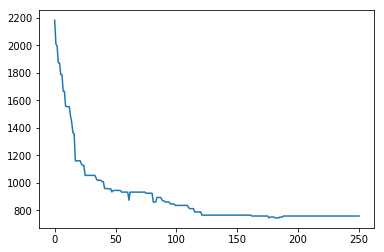

In [0]:
geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=20, mutationRate=0.1, generations=250)

In [0]:
# Zadanie 9**: Zaimplementuj rozne rodzaje algorytmu selekcji i porownaj
# w jaki sposob zmienia sie funkcja przystosowania, jak szybko otrzymujemy coraz
# to lepsze wyniki. - 3 ptk
def nextGenerationCustomSelection(currentGen, eliteSize, mutationRate, selectionAlgorithm):
    popRanked = rankRoutes(currentGen)
    selectionResults = selectionAlgorithm(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

def geneticAlgorithmDistanceListCustomSelection(population, popSize, eliteSize, mutationRate, generations, selectionAlgorithm):
    pop = initialPopulation(popSize, population)
 
    allDistances = []
    
    for i in range(0, generations + 1):
        allDistances.append(1/rankRoutes(pop)[0][1])
        pop = nextGenerationCustomSelection(pop, eliteSize, mutationRate, selectionAlgorithm)
    
    return allDistances
  
def geneticAlgorithmPlotAndCompare(population, popSize, eliteSize, mutationRate, generations):
    allDistances1 = geneticAlgorithmDistanceListCustomSelection(population, popSize, eliteSize, mutationRate, generations, rouletteWheelSelectionRandom)
    plt.plot(range(len(allDistances1)), allDistances1, label="Roulette Wheel Selection 1")
    allDistances3 = geneticAlgorithmDistanceListCustomSelection(population, popSize, eliteSize, mutationRate, generations, rouletteWheelSelection)
    plt.plot(range(len(allDistances3)), allDistances3, label="Roulette Wheel Selection 2")
    allDistances2 = geneticAlgorithmDistanceListCustomSelection(population, popSize, eliteSize, mutationRate, generations, tournamentSelection)
    plt.plot(range(len(allDistances2)), allDistances2, label="Tournament Selection")
    allDistances4 = geneticAlgorithmDistanceListCustomSelection(population, popSize, 0, mutationRate, generations, tournamentSelection)
    plt.plot(range(len(allDistances4)), allDistances4, label="Tournament Selection - no elite")
    allDistances5 = geneticAlgorithmDistanceListCustomSelection(population, popSize, 0, mutationRate, generations, rankSelection)
    plt.plot(range(len(allDistances5)), allDistances5, label="Rank selection")
    
    plt.rcParams["figure.figsize"] = (20,10)
    plt.legend()
    plt.show()
    
    pass

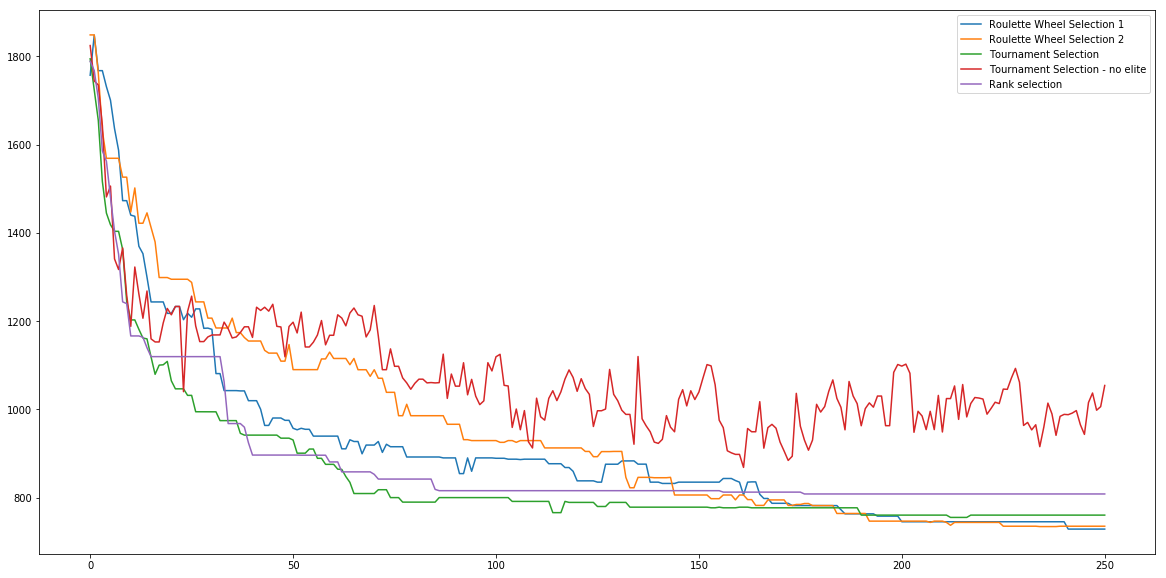

In [0]:
geneticAlgorithmPlotAndCompare(population=cityList, popSize=100, eliteSize=20, mutationRate=0.2, generations=250)